In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist.data
y = mnist.target

# Normalize the data
X /= 255.0

In [4]:
overall_max_value = X.values.max()
overall_max_position = X.values.argmax()

# Find the overall minimum value and its position
overall_min_value = X.values.min()
overall_min_position = X.values.argmin()

print("\nOverall maximum value:", overall_max_value)
print("Overall position of maximum value:", overall_max_position)

print("\nOverall minimum value:", overall_min_value)
print("Overall position of minimum value:", overall_min_position)


Overall maximum value: 1.0
Overall position of maximum value: 161

Overall minimum value: 0.0
Overall position of minimum value: 0


In [5]:
u, s, vt = np.linalg.svd(X, full_matrices=False)

In [6]:
print('Number of singular values:', len(s))

Number of singular values: 784


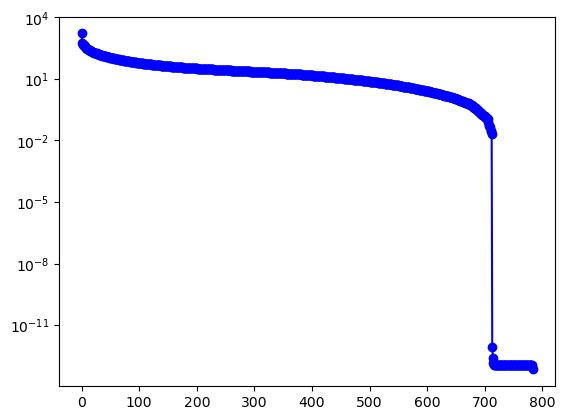

In [7]:
plt.semilogy(s, marker='o', color='blue')
plt.show()

In [8]:
r = np.max(np.where(s > 10**-3))
print('The rank that is good enough is ',r+1)

The rank that is good enough is  713


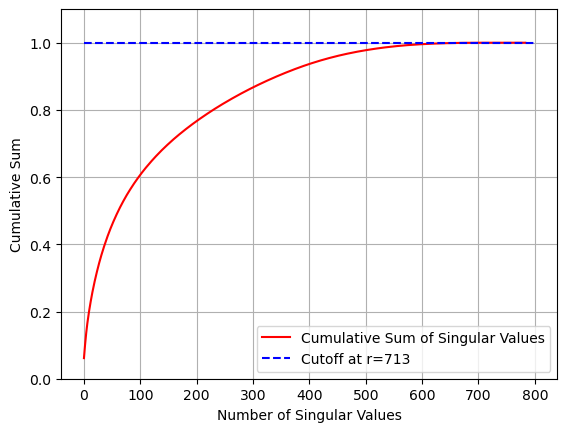

In [9]:
plt.plot(np.cumsum(s)/np.sum(s), color="red", label="Cumulative Sum of Singular Values")
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Sum')
plt.ylim(0,1.1)
plt.hlines(np.cumsum(s)[r] / np.sum(s), 0, 800, color='blue', linestyle='--', label=f'Cutoff at r={r+1}')
plt.grid()
plt.legend(loc = 'lower right')
plt.show()


In [10]:
np.cumsum(s)[r] / np.sum(s)

0.9999999999999987

In [11]:
Xclean = u[:,:(r+1)] @ np.diag(s[:(r+1)]) @ vt[:(r+1),:]

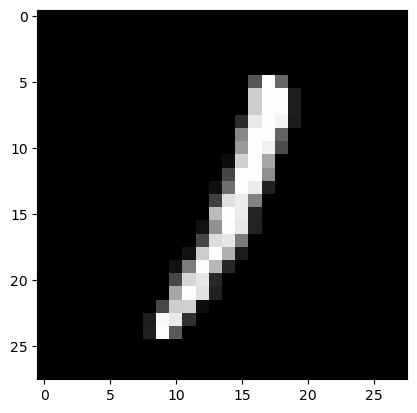

In [12]:
col = Xclean[99]

# Reshape the row into a 28x28 matrix
matrix = col.reshape(28, 28)

# Plot each entry of the matrix
plt.imshow(matrix, cmap='gray')
plt.show()

In [13]:
digit_2_mask = (y == '2')
digit_7_mask = (y == '7')
selected_mask = digit_2_mask | digit_7_mask

# Create binary dataset for digits 2 and 7
X_selected = Xclean[selected_mask]
y_selected = y[selected_mask]


In [14]:
X_selected = np.where(X_selected < 10**(-9), 0, X_selected)
X_selected = np.where(X_selected > 1, 1, X_selected)

In [15]:
y_selected = np.array(y_selected, dtype=int)
y_selected = np.where(y_selected == 2, 0, y_selected)
y_selected = np.where(y_selected == 7, 1, y_selected)
y_selected

array([0, 1, 0, ..., 0, 1, 0])

Accuracy: 0.9835491774588729


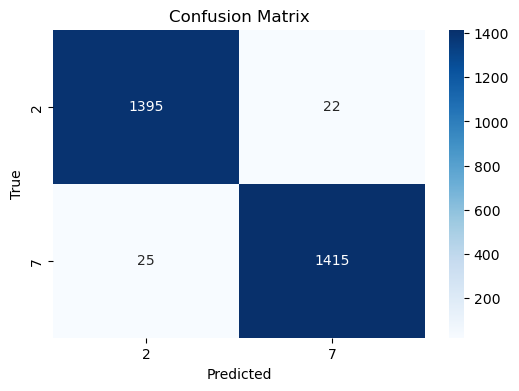

In [16]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

X_train, X_val, y_train, y_val = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Create LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lda.predict(X_val)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
print("Accuracy:", accuracy)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[2,7], yticklabels=[2,7])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [17]:
digit_2_mask = (y == '2')
digit_7_mask = (y == '7')
digit_9_mask = (y == '9')
selected_mask = digit_2_mask | digit_7_mask | digit_9_mask

# Create binary dataset for digits 2 and 7
X_selected = Xclean[selected_mask]
y_selected = y[selected_mask]

# Create binary dataset for digits 2, 7, and 9
X_selected = Xclean[selected_mask]
X_selected = np.where(X_selected < 10**(-9), 0, X_selected)
X_selected = np.where(X_selected > 1, 1, X_selected)
y_selected = y[selected_mask]


Accuracy: 0.9402212285243586


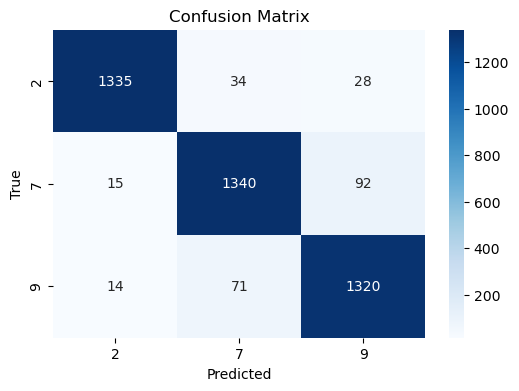

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Create LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lda.predict(X_val)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[2,7,9], yticklabels=[2,7,9])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [19]:
from itertools import combinations

# Iterate through all combinations of two digits
digit_combinations = combinations(range(10), 2)

most_difficult_digits = None
lowest_accuracy = 1.0

for digit_pair in digit_combinations:
    mask_1 = (y == str(digit_pair[0]))
    mask_2 = (y == str(digit_pair[1]))

    selected_mask = mask_1 | mask_2
    X_selected = Xclean[selected_mask]
    X_selected = np.where(X_selected < 10**(-9), 0, X_selected)
    X_selected = np.where(X_selected > 1, 1, X_selected)
    y_selected = y[selected_mask]
    

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

    # Create LDA classifier
    lda = LinearDiscriminantAnalysis()

    # Train the classifier on the training set
    lda.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lda.predict(X_test)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update the most difficult digits if the current accuracy is lower
    if accuracy < lowest_accuracy:
        most_difficult_digits = digit_pair
        lowest_accuracy = accuracy

print("Most Difficult Digits:", most_difficult_digits)
print("Accuracy:", lowest_accuracy)

Most Difficult Digits: (3, 5)
Accuracy: 0.9502043849869937


In [20]:
digit_combinations = combinations(range(10), 2)

easiest_digits = None
highest_accuracy = 0.0

for digit_pair in digit_combinations:
    mask_1 = (y == str(digit_pair[0]))
    mask_2 = (y == str(digit_pair[1]))

    selected_mask = mask_1 | mask_2
    X_selected = Xclean[selected_mask]
    X_selected = np.where(X_selected < 10**(-9), 0, X_selected)
    X_selected = np.where(X_selected > 1, 1, X_selected)
    y_selected = y[selected_mask]
    

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

    # Create LDA classifier
    lda = LinearDiscriminantAnalysis()

    # Train the classifier on the training set
    lda.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lda.predict(X_test)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update the easiest digits if the current accuracy is higher
    if accuracy > highest_accuracy:
        easiest_digits = digit_pair
        highest_accuracy = accuracy

print("Easiest Digits to Distinguish:", easiest_digits)
print("Accuracy:", highest_accuracy)

Easiest Digits to Distinguish: (6, 7)
Accuracy: 0.9961185603387438


In [21]:
Xclean = np.where(Xclean < 10**(-9), 0, Xclean)
Xclean = np.where(Xclean > 1, 1, Xclean)
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(Xclean, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

SVM Accuracy: 0.9764285714285714
Decision Tree Accuracy: 0.8745714285714286


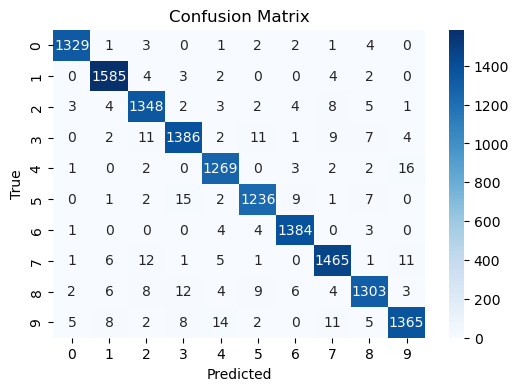

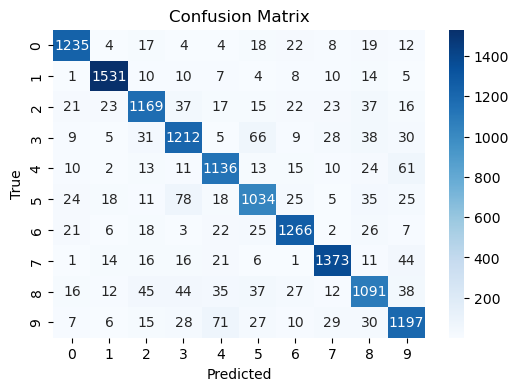

In [23]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(svm_conf_matrix, f'SVM Confusion Matrix (Accuracy: {svm_accuracy:.2f})')
plot_confusion_matrix(dt_conf_matrix, f'Decision Tree Confusion Matrix (Accuracy: {dt_accuracy:.2f})')

LDA Accuracy: 0.9502043849869937
SVM Accuracy: 0.9925678186547752
Decision Tree Accuracy: 0.9620958751393534


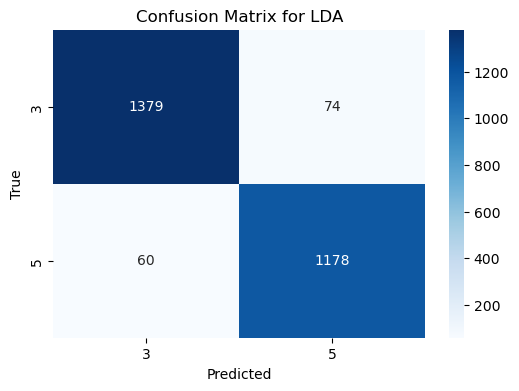

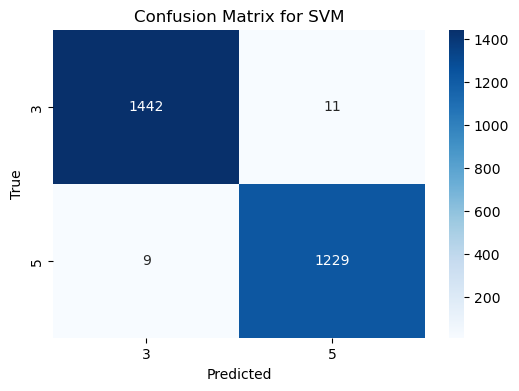

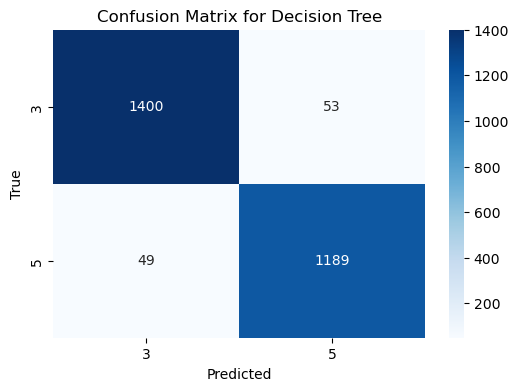

In [24]:
digit_3_mask = (y == 3)
digit_5_mask = (y == 5)
selected_mask = digit_3_mask | digit_5_mask

X_selected = Xclean[selected_mask]
y_selected = y[selected_mask]

X_selected = np.where(X_selected < 10**(-9), 0, X_selected)
X_selected = np.where(X_selected > 1, 1, X_selected)


X_train, X_val, y_train, y_val = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Classifier
lda = LinearDiscriminantAnalysis()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
lda.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lda = lda.predict(X_val)
y_pred_svm = svm_classifier.predict(X_val)
y_pred_dt = dt_classifier.predict(X_val)

# Calculate accuracy and confusion matrix
lda_accuracy = accuracy_score(y_val, y_pred_lda)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
dt_accuracy = accuracy_score(y_val, y_pred_dt)

print("LDA Accuracy:", lda_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

lda_conf_matrix = confusion_matrix(y_val, y_pred_lda)
plt.figure(figsize=(6, 4))
sns.heatmap(lda_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[3,5], yticklabels=[3,5])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for LDA")
plt.show()

svm_conf_matrix = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[3,5], yticklabels=[3,5])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM")
plt.show()

dt_conf_matrix = confusion_matrix(y_val, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[3,5], yticklabels=[3,5])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

LDA Accuracy: 0.9961185603387438
SVM Accuracy: 1.0
Decision Tree Accuracy: 0.9915314043754411


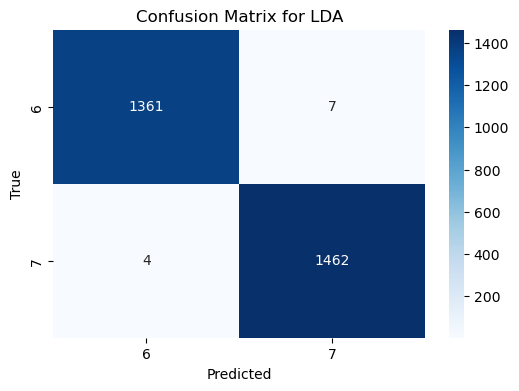

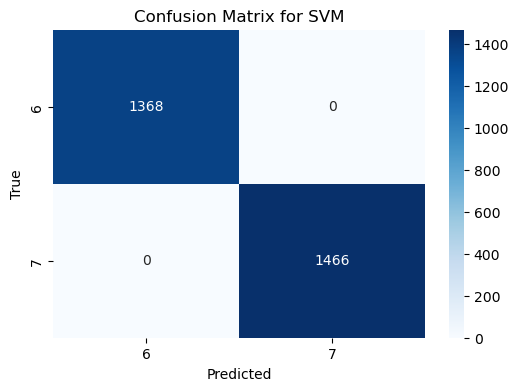

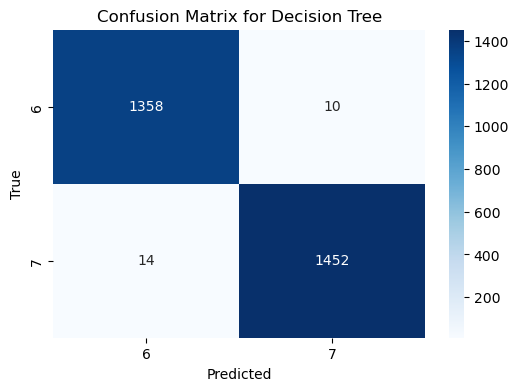

In [25]:
digit_6_mask = (y == 6)
digit_7_mask = (y == 7)
selected_mask = digit_6_mask | digit_7_mask

X_selected = Xclean[selected_mask]
y_selected = y[selected_mask]

X_selected = np.where(X_selected < 10**(-9), 0, X_selected)
X_selected = np.where(X_selected > 1, 1, X_selected)


X_train, X_val, y_train, y_val = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Classifier
lda = LinearDiscriminantAnalysis()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
lda.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lda = lda.predict(X_val)
y_pred_svm = svm_classifier.predict(X_val)
y_pred_dt = dt_classifier.predict(X_val)

# Calculate accuracy and confusion matrix
lda_accuracy = accuracy_score(y_val, y_pred_lda)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
dt_accuracy = accuracy_score(y_val, y_pred_dt)

print("LDA Accuracy:", lda_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

lda_conf_matrix = confusion_matrix(y_val, y_pred_lda)
plt.figure(figsize=(6, 4))
sns.heatmap(lda_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[6,7], yticklabels=[6,7])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for LDA")
plt.show()

svm_conf_matrix = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[6,7], yticklabels=[6,7])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM")
plt.show()

dt_conf_matrix = confusion_matrix(y_val, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[6,7], yticklabels=[6,7])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()